In [45]:
import cv2
import numpy as np
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('yolov8n.pt')  # Adjust if using a different YOLOv8 model

# Define the region of interest (ROI) for tracking
region1 = np.array([
    (400, 200),  # Sol üst nokta sabit
    (1700, 200),  # Sağ üst nokta sabit
    (3400, 1800),  # Sağ alt nokta 
    (1400, 1800)   # Sol alt nokta
])

region1 = region1.reshape((-1, 1, 2))

# Set paths for input and output files
video_path = 'video.mov'  # Adjust the path
output_file = 'output_video.mp4'  # Adjust the path

# Initialize video capture
kamera = cv2.VideoCapture(video_path)

# Get video FPS
fps = kamera.get(cv2.CAP_PROP_FPS)
print(f"Video FPS: {fps}")

# Initialize frame count and dictionary to track first entry frames
count = 0
first_entering = {}

# Get video dimensions and set up video writer
frame_width = int(kamera.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(kamera.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 file
out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))

while True:
    ret, frame = kamera.read()
    if not ret:
        break
    
    count += 1
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Perform detection with YOLO
    results = model.track(frame_rgb, persist=True, verbose=False)
    labels = results[0].names

    for i in range(len(results[0].boxes)):
        x1, y1, x2, y2 = results[0].boxes.xyxy[i]
        score = results[0].boxes.conf[i]
        label = results[0].boxes.cls[i]
        ids = results[0].boxes.id[i]

        x1, y1, x2, y2, score, label, ids = int(x1), int(y1), int(x2), int(y2), float(score), int(label), int(ids)
        name = labels[label]

        if score < 0.5 or name != 'person':
            continue

        cx = int((x1 + x2) / 2)
        cy = int((y1 + y2) / 2)

        inside_region1 = cv2.pointPolygonTest(region1, (cx, cy), False)
        
        if inside_region1 > 0:
            if ids in first_entering:
                frame_diff = count - first_entering[ids]
                time_spent = frame_diff / fps
                time_spent = int(time_spent)
                text_time = f'Stayed: {time_spent} s'
                cv2.putText(frame, text_time, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
            else:
                first_entering[ids] = count

    # Draw the region with blue lines and thickness 7
    cv2.polylines(frame, [region1], True, (255, 255, 0), 7)
    
    # Write the frame with annotations to the output video file
    out.write(frame)
    
    # Display the frame
    cv2.imshow("Video", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and writer, and close all OpenCV windows
kamera.release()
out.release()
cv2.destroyAllWindows()


Video FPS: 59.157303370786515


In [46]:
import cv2
import numpy as np
from ultralytics import YOLO
import pandas as pd

# Load the YOLO model
model = YOLO('yolov8n.pt')  # Adjust if using a different YOLOv8 model

# Define the region of interest (ROI) for tracking
region1 = np.array([
    (400, 200),  # Sol üst nokta 
    (1700, 200),  # Sağ üst nokta 
    (3400, 1800),  # Sağ alt nokta 
    (1400, 1800)   # Sol alt nokta
])
region1 = region1.reshape((-1, 1, 2))

# Set paths for input and output files
video_path = 'video.mov'  # Adjust the path
output_file = 'output_video2.mp4'  # Adjust the path

# Initialize video capture
kamera = cv2.VideoCapture(video_path)

# Get video FPS
fps = kamera.get(cv2.CAP_PROP_FPS)
print(f"Video FPS: {fps}")

# Initialize frame count and dictionary to track first entry frames
count = 0
first_entering = {}
time_spent_list = []

# Get video dimensions and set up video writer
frame_width = int(kamera.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(kamera.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 file
out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))

while True:
    ret, frame = kamera.read()
    if not ret:
        break
    
    count += 1
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Perform detection with YOLO
    results = model.track(frame_rgb, persist=True, verbose=False)
    labels = results[0].names

    for i in range(len(results[0].boxes)):
        x1, y1, x2, y2 = results[0].boxes.xyxy[i]
        score = results[0].boxes.conf[i]
        label = results[0].boxes.cls[i]
        ids = results[0].boxes.id[i]

        x1, y1, x2, y2, score, label, ids = int(x1), int(y1), int(x2), int(y2), float(score), int(label), int(ids)
        name = labels[label]

        if score < 0.5 or name != 'person':
            continue

        cx = int((x1 + x2) / 2)
        cy = int((y1 + y2) / 2)

        inside_region1 = cv2.pointPolygonTest(region1, (cx, cy), False)
        
        if inside_region1 > 0:
            if ids in first_entering:
                frame_diff = count - first_entering[ids]
                time_spent = frame_diff / fps
                time_spent = int(time_spent)
                text_time = f'Stayed: {time_spent} s'
                cv2.putText(frame, text_time, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

                # Save time spent data for the person
                time_spent_list.append({'ID': ids, 'TimeSpent(s)': time_spent})

            else:
                first_entering[ids] = count

    # Draw the region with blue lines and thickness 7
    cv2.polylines(frame, [region1], True, (255, 255, 0), 7)
    
    # Write the frame with annotations to the output video file
    out.write(frame)
    
    # Display the frame
    cv2.imshow("Video", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and writer, and close all OpenCV windows
kamera.release()
out.release()
cv2.destroyAllWindows()

# Create a DataFrame from the time spent list
df = pd.DataFrame(time_spent_list)

# Display the DataFrame
print(df)

# Save the DataFrame to a CSV file
df.to_csv('time_spent_in_region.csv', index=False)

Video FPS: 59.157303370786515
      ID  TimeSpent(s)
0      1             0
1      2             0
2      3             0
3      5             0
4      7             0
...   ..           ...
2892   1            11
2893   1            11
2894   1            11
2895   2            11
2896  14             3

[2897 rows x 2 columns]


In [47]:
df.head()

,ID,TimeSpent(s)
0,1,0
1,2,0
2,3,0
3,5,0
4,7,0


In [48]:
df.tail()

,ID,TimeSpent(s)
2892,1,11
2893,1,11
2894,1,11
2895,2,11
2896,14,3


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897 entries, 0 to 2896
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            2897 non-null   int64
 1   TimeSpent(s)  2897 non-null   int64
dtypes: int64(2)
memory usage: 45.4 KB


In [58]:
df["TimeSpent(s)"].sum()/(60*60)

3.3938888888888887

In [59]:
df.ID.unique()

array([ 1,  2,  3,  5,  7,  9, 12,  8, 14, 16], dtype=int64)

In [65]:
df.ID=df.ID.astype("object")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897 entries, 0 to 2896
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            2897 non-null   object
 1   TimeSpent(s)  2897 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.4+ KB


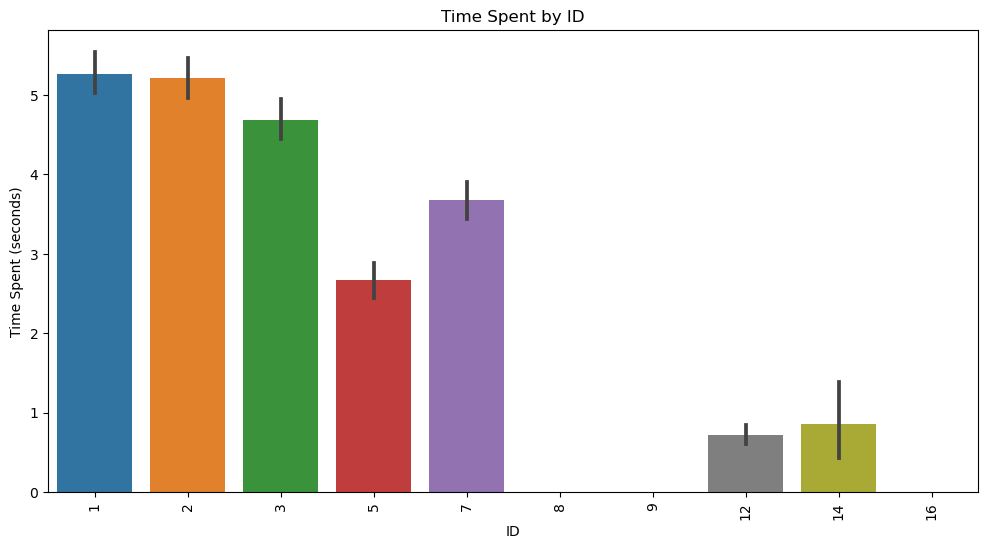

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Seaborn ile bir bar grafiği oluşturma
plt.figure(figsize=(12, 6))
sns.barplot(x='ID', y='TimeSpent(s)', data=df)  # Verilerin ilk 50 satırını göster
plt.title('Time Spent by ID')
plt.xlabel('ID')
plt.ylabel('Time Spent (seconds)')
plt.xticks(rotation=90)  # X ekseni etiketlerini döndürme
plt.show()

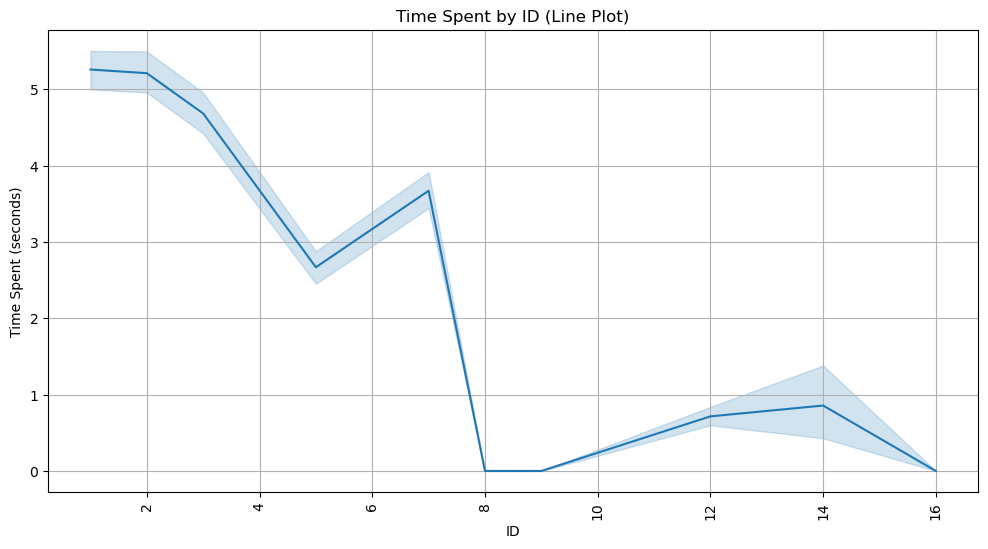

In [69]:
# Seaborn ile bir line grafiği oluşturma
plt.figure(figsize=(12, 6))
sns.lineplot(x='ID', y='TimeSpent(s)', data=df)  
plt.title('Time Spent by ID (Line Plot)')
plt.xlabel('ID')
plt.ylabel('Time Spent (seconds)')
plt.xticks(rotation=90)  # X ekseni etiketlerini döndürme
plt.grid(True)
plt.show()

**Grafiklere dayanarak birkaç gözlem yapılabilir:**

**1-Bar Grafiği (Yukarıdaki Grafik):**
**Veri Dağılımı:** Bu grafikte, farklı ID'lerin belirli bir alanda ne kadar zaman geçirdiği gösterilmektedir. Yükseklikler, her bir kişinin o alanda kalma süresini (saniye cinsinden) temsil ediyor.
Belirgin Zaman Farklılıkları: İlk birkaç kişi (1, 2, 3, 5, 7 numaralı ID'ler) daha uzun süreler harcarken, diğer ID'ler (12, 14 gibi) daha az zaman geçirmiş.
**Veri Sayısı:** Grafik, belirli ID'ler için veriyi göstermekte ve bunlar arasında belirgin bir fark olduğu gözlenmekte. Örneğin, 1, 2 ve 3 numaralı ID'ler yaklaşık olarak 5 saniye harcarken, diğerleri daha az zaman harcamış.
**2-Line Grafiği :**
**Trend ve Dalgalanmalar:** Çizgi grafiği, her ID'nin zaman harcama eğilimini göstermektedir. İlk birkaç ID'nin zaman harcama miktarlarında bir azalma görülmekte, daha sonra düşük bir noktaya ulaşıldığında tekrar hafif bir artış gözleniyor.
**Görsel Akıcılık:** Line grafiği, zaman harcama verilerindeki dalgalanmaları daha akıcı ve net bir şekilde gösteriyor. Özellikle 5. ve 7. ID'ler arasında zaman harcamada belirgin bir azalma var.
**Belirsizlik Bantları:** Grafikteki gölgeli alanlar, verilerdeki belirsizlik veya dağılımı göstermektedir. Bu da verinin ne kadar güvenilir olduğunu veya ne kadar değişkenlik gösterdiğini anlamaya yardımcı olabilir.
**Genel Değerlendirme:**
Her iki grafik de belirli kişilerin bir alanda harcadığı süreler arasında önemli farklılıklar olduğunu göstermektedir.
Bar grafiği, bireysel karşılaştırmalar için iyi bir genel bakış sağlarken, çizgi grafiği zaman içinde sürelerin nasıl değiştiğini daha iyi vurguluyor.
Belirsizlik bantları, çizgi grafiğindeki veri dalgalanmalarını daha iyi anlamaya yardımcı olabilir.
Bu grafikler, farklı ID'lerin belirli bir alanda geçirdiği süredeki farklılıkları ve bu sürelerin eğilimlerini analiz etmek için kullanılabilir. 

### Eğer bu bekleme süresi bir mağazanın reyonu önünde gerçekleşiyorsa, bu verilere dayalı olarak firma yetkililerine çeşitli önerilerde bulunulabilir:

1. **Reyon Düzeni ve Yerleşim Analizi:**

**Yüksek Bekleme Süresi Olan Bölgeler:**
Eğer belirli bir reyonun önünde yüksek bekleme süreleri tespit ediliyorsa, bu reyonun müşteriler tarafından ilgi çektiği anlamına gelebilir. Bu tür reyonlarda ürün sergileme teknikleri geliştirilebilir veya müşteri ilgisini daha da artırmak için promosyonlar yapılabilir.

**Düşük Bekleme Süresi Olan Bölgeler:**
 Aksine, bazı reyonlar önünde düşük bekleme süreleri gözlemleniyorsa, bu reyonların düzeni, ürün seçimi veya yerleşiminde bir problem olabilir. Bu reyonları daha çekici hale getirmek için yeniden düzenlemeler yapılabilir veya ürünlerin yerleri değiştirilebilir.

2. Ürün ve Stok Yönetimi:

**Popüler Ürünler:**
 Yüksek bekleme süreleri olan reyonlar, popüler ürünlerin bulunduğu alanlar olabilir. Bu durumda, bu ürünlerin stoklarının yeterli olup olmadığı kontrol edilmelidir. Popüler ürünler için stok artırımı veya çeşitlendirme yapılabilir.

**Daha Az İlgi Gören Ürünler:**
 Düşük bekleme süreleri olan reyonlarda bulunan ürünlerin satış performansı düşük olabilir. Bu ürünler için indirimler veya promosyonlar düzenlenebilir, ürünlerin müşteri ilgisini çekip çekmediği analiz edilebilir. Ya da yüksek bekleme olan reyonlardaki ürünlerle yer değişikliği yapılabilir.

3. Mağaza İçi Deneyim İyileştirmeleri:

**Müşteri Akışını Yönlendirme:** Müşterilerin belirli reyonlarda uzun süre beklemesi, mağaza içinde trafik sıkışıklığına yol açabilir. Müşteri akışını daha etkin bir şekilde yönetmek için reyonların yerleşimi veya mağaza içi yönlendirme levhaları iyileştirilebilir.

**Bekleme Alanları:** Eğer müşteriler belirli reyonlar önünde çok uzun süre bekliyorlarsa, bu alanlara yakın rahat oturma alanları, bilgi ekranları veya ürün tanıtım videoları gibi müşteri deneyimini iyileştirecek unsurlar eklenebilir.

4. Personel ve Müşteri Hizmetleri:

**Personel Dağılımı:**
 Yüksek bekleme sürelerinin olduğu reyonlar, ekstra personel desteği gerektirebilir. Bu reyonlarda müşterilere daha hızlı ve etkili hizmet vermek için ek personel görevlendirilebilir.

**Müşteri Geri Bildirimi:**
 Belirli reyonlarda uzun süre bekleyen müşterilere neden bu kadar bekledikleri sorulabilir ve bu bilgiler, müşteri deneyimini iyileştirmek için kullanılabilir.

5. Reklam ve Pazarlama Stratejileri:
**Veri Destekli Kampanyalar:**
 Bekleme sürelerine göre en popüler reyonların analiz edilmesi, firma için veri odaklı pazarlama stratejileri geliştirmeye yardımcı olabilir. Örneğin, bu reyonlardaki ürünler için hedeflenmiş reklam kampanyaları düzenlenebilir.
**Müşteri Segmentasyonu:**
 Bekleme sürelerine göre müşterilerin hangi segmentlerinin hangi reyonlarda daha fazla zaman geçirdiği analiz edilerek, bu segmentlere yönelik özel kampanyalar oluşturulabilir.
6. Teknolojik Yatırımlar:
**Akıllı Mağaza Sistemleri:**
 Mağaza içi müşteri hareketlerini izleyen sensörler ve kameralar gibi teknolojiler kullanılarak, müşteri davranışları daha iyi analiz edilebilir ve bekleme süreleri daha doğru bir şekilde ölçülebilir.
 
**Self-Checkout ve Mobil Ödeme İmkanları:**
 Uzun bekleme sürelerini azaltmak için müşterilerin hızlı bir şekilde ödemelerini yapabilecekleri self-checkout ve mobil ödeme sistemleri teşvik edilebilir.

Bu öneriler, bekleme süreleri analizinden elde edilen verilere dayalı olarak müşteri memnuniyetini artırmak, satışları optimize etmek ve genel mağaza performansını iyileştirmek için kullanılabilir.

## Akıllı Mağaza Sistemleri
Müşteri davranışlarını izleyerek ve analiz ederek mağaza içi operasyonları optimize etmenizi sağlayan teknolojilerdir. Bu tür sistemler, müşteri deneyimini iyileştirmek, personel verimliliğini artırmak ve satışları optimize etmek için birçok avantaj sunar. Akıllı mağaza sistemleri için önerilerim şunlar:

1. Müşteri Takip ve Analiz Sistemleri:

**Kamera Tabanlı İzleme:** Yüksek çözünürlüklü kameralar ve yapay zeka algoritmaları kullanarak mağaza içinde müşterilerin hareketlerini takip edebilirsiniz. Bu sistemler, hangi reyonların daha fazla ilgi gördüğünü, nerelerde yığılma yaşandığını ve müşterilerin mağaza içinde izledikleri yolları analiz etmenize olanak tanır.

**Isı Haritaları (Heatmaps):** Kamera verileriyle oluşturulan ısı haritaları, mağazada en çok ziyaret edilen bölgeleri ve ilgi gören reyonları belirlemenizi sağlar. Bu veriler, ürün yerleşimini optimize etmek ve müşteri akışını iyileştirmek için kullanılabilir.

**RFID Takip Sistemleri:** Ürünlere yerleştirilen RFID etiketleri ile ürünlerin hareketleri izlenebilir ve müşterilerin hangi ürünlere ilgi gösterdiği, hangi ürünlerin daha fazla incelendiği veya satın alındığı analiz edilebilir.

2. Kişiselleştirilmiş Müşteri Deneyimi:

**Dijital Kiosklar:** Müşterilere mağaza içi yönlendirme, ürün bilgileri, kampanyalar ve özel teklifler sunan dijital kiosklar yerleştirilebilir. Bu kiosklar, müşterilerin ilgi alanlarına göre kişiselleştirilmiş öneriler sunabilir.

**Mobil Uygulamalar ve Beacons:** Mobil uygulamalar aracılığıyla müşterilere, mağazada gezindikleri sırada özel indirimler veya ürün önerileri sunabilirsiniz. Beacon teknolojisi kullanarak, müşterilerin konumuna göre kişiselleştirilmiş bildirimler gönderebilirsiniz.

3. Self-Checkout Sistemleri:

**Akıllı Sepetler:** Müşterilerin alışveriş yaparken sepetlerine ekledikleri ürünleri otomatik olarak tanıyan ve toplam fiyatı gösteren akıllı alışveriş sepetleri. Bu, ödeme sürecini hızlandırarak müşterilerin bekleme sürelerini azaltabilir.

**Self-Checkout Kioskları:** Müşterilerin kendi ödemelerini yapmalarına olanak tanıyan self-checkout kioskları, kasada oluşan kuyrukları ve bekleme sürelerini azaltmak için etkili bir çözüm olabilir.
4. Envanter Yönetimi ve Stok Takibi:

**Akıllı Raflar:** Ürün stoklarını otomatik olarak izleyen ve azalan stokları anında bildiren akıllı raflar. Bu sistem, ürünlerin reyonlarda sürekli olarak mevcut olmasını sağlayarak müşteri memnuniyetini artırır.

**Otomatik Stok Yenileme Sistemleri:** Mağaza içinde bulunan RFID okuyucular ve sensörler aracılığıyla envanter hareketlerini takip edebilir ve stoklar azaldığında otomatik olarak tedarik siparişleri verebilirsiniz.

5. Müşteri ve Personel Etkileşimi:

**Sanal Asistanlar:** Mağaza içinde, müşterilere ürün bulmalarına, özellikleri hakkında bilgi edinmelerine veya mağaza içi kampanyalardan haberdar olmalarına yardımcı olacak yapay zeka destekli sanal asistanlar yerleştirilebilir.

**Çalışan Yönlendirme Sistemleri:** Akıllı mağaza sistemleri, müşteri yoğunluğu olan reyonları tespit ederek personelin bu alanlara yönlendirilmesini sağlayabilir. Bu, müşteri hizmetinin hızını ve kalitesini artırır.

6. Veri Analitiği ve Raporlama:

**Gerçek Zamanlı Veri Analizi:** Mağaza içinde toplanan verileri gerçek zamanlı olarak analiz edebilen ve yöneticilere bu veriler doğrultusunda anında karar alma imkanı sunan veri analitiği sistemleri.

**Tahmin Analitiği:** Müşteri davranışlarını ve satış trendlerini tahmin eden yapay zeka destekli analitik araçlar. Bu sistemler, gelecekteki talepleri öngörerek envanter yönetimi ve satış stratejilerini optimize etmek için kullanılabilir.

7. Entegre Mağaza Yönetimi Platformları:

**Tüm Sistemlerin Entegrasyonu:** Tüm akıllı mağaza teknolojilerini tek bir platformda entegre ederek, mağaza yöneticilerinin her şeyi merkezi bir yerden yönetmesine olanak tanıyacak entegre yönetim platformları kurulabilir. Bu, verimliliği artırır ve mağaza içi operasyonların daha sorunsuz bir şekilde yürütülmesini sağlar.

Bu akıllı mağaza teknolojileri, müşteri memnuniyetini artırarak ve operasyonel verimliliği iyileştirerek firmanın rekabet gücünü artırabilir. Ayrıca, veri tabanlı karar alma süreçlerini geliştirerek, mağaza içi satışları ve müşteri sadakatini artırmak için değerli içgörüler sunar.